In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

from tensorflow.keras.utils import to_categorical
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D, Bidirectional, ConvLSTM1D
from tensorflow.keras.layers import Input, TimeDistributed, MaxPooling1D, BatchNormalization, GlobalAveragePooling1D, Activation
from tensorflow.python.keras.utils import np_utils
from sklearn.metrics import precision_score, recall_score, f1_score

from typing import Any, Dict, List, Tuple
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values



# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


# load the dataset, returns train and test X and y elements
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/UCI HAR Dataset/')
    # load all test
    testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/UCI HAR Dataset/')

    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1

    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot



In [4]:
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


In [5]:
print("X train shape: ", trainX.shape)
print("Y train shape: ", trainy.shape)
print("Y train One hot shape: ", trainy_one_hot.shape)
print("X test shape: ", testX.shape)
print("Y test shape: ", testy.shape)
print("Y test One hot shape: ", testy_one_hot.shape)

X train shape:  (7352, 128, 9)
Y train shape:  (7352, 1)
Y train One hot shape:  (7352, 6)
X test shape:  (2947, 128, 9)
Y test shape:  (2947, 1)
Y test One hot shape:  (2947, 6)


In [6]:
print("0: Walking:" ,np.where(trainy == 0)[0].size)
print("1: WU:" ,np.where(trainy == 1)[0].size)
print("2: WD:" ,np.where(trainy == 2)[0].size)
print("3: Sitting:" ,np.where(trainy == 3)[0].size)
print("4: Standing:" ,np.where(trainy == 4)[0].size)
print("5: Laying:" ,np.where(trainy == 5)[0].size)

0: Walking: 1226
1: WU: 1073
2: WD: 986
3: Sitting: 1286
4: Standing: 1374
5: Laying: 1407


In [7]:
unique, counts = np.unique(trainy, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)

unique, counts = np.unique(testy, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]
 [   3 1286]
 [   4 1374]
 [   5 1407]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]
 [  3 491]
 [  4 532]
 [  5 537]]


In [8]:
X_train_all = trainX   # at this stage, the data includes both dynamic and static HAR data
y_train_all = trainy

X_test_all = testX
y_test_all = testy

In [9]:

trainy_one_hot = to_categorical(trainy)
testy_one_hot = to_categorical(testy)

In [10]:
print("X train shape: ", trainX.shape)
print("Y train shape: ", trainy.shape)
print("Y train One hot shape: ", trainy_one_hot.shape)
print("X test shape: ", testX.shape)
print("Y test shape: ", testy.shape)
print("Y test One hot shape: ", testy_one_hot.shape)

X train shape:  (7352, 128, 9)
Y train shape:  (7352, 1)
Y train One hot shape:  (7352, 6)
X test shape:  (2947, 128, 9)
Y test shape:  (2947, 1)
Y test One hot shape:  (2947, 6)


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.3,random_state=100)

In [12]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy_one_hot.shape[1]

# CNN1

In [ ]:
# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 126, 64)           1792      
                                                                 
 flatten_4 (Flatten)         (None, 8064)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               1032320   
                                                                 
 dense_9 (Dense)             (None, 6)                 774       
                                                                 
Total params: 1034886 (3.95 MB)
Trainable params: 1034886 (3.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)


Epoch 1/10
58/58 [==============================] - 4s 45ms/step - loss: 0.5698 - accuracy: 0.7689 - val_loss: 0.2999 - val_accuracy: 0.8994
Epoch 2/10
58/58 [==============================] - 2s 37ms/step - loss: 0.2430 - accuracy: 0.9157 - val_loss: 0.1806 - val_accuracy: 0.9424
Epoch 3/10
58/58 [==============================] - 2s 35ms/step - loss: 0.1587 - accuracy: 0.9416 - val_loss: 0.1326 - val_accuracy: 0.9524
Epoch 4/10
58/58 [==============================] - 2s 34ms/step - loss: 0.1283 - accuracy: 0.9516 - val_loss: 0.1270 - val_accuracy: 0.9470
Epoch 5/10
58/58 [==============================] - 2s 37ms/step - loss: 0.1160 - accuracy: 0.9547 - val_loss: 0.1068 - val_accuracy: 0.9601
Epoch 6/10
58/58 [==============================] - 3s 57ms/step - loss: 0.1159 - accuracy: 0.9516 - val_loss: 0.1020 - val_accuracy: 0.9592
Epoch 7/10
58/58 [==============================] - 3s 46ms/step - loss: 0.1047 - accuracy: 0.9543 - val_loss: 0.1008 - val_accuracy: 0.9597
Epoch 8/10
58

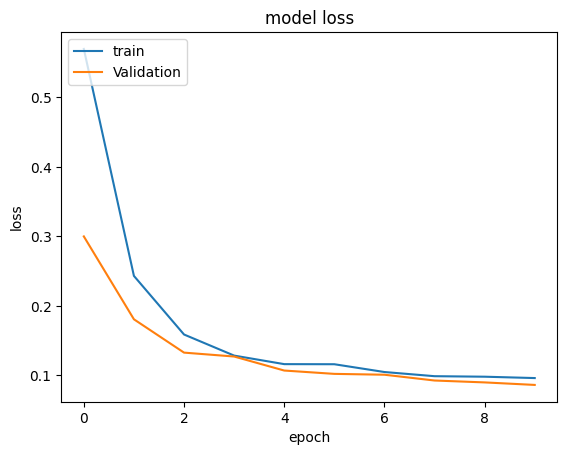

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

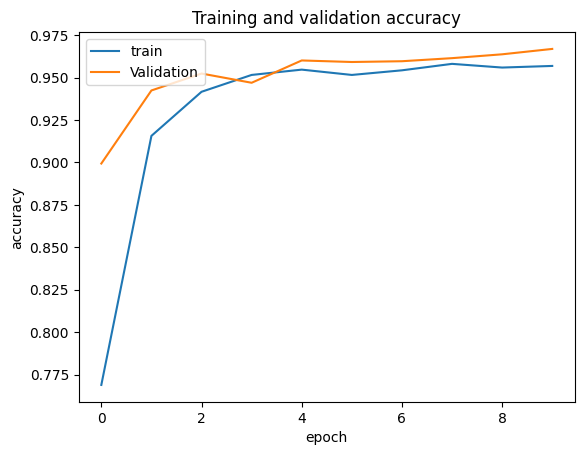

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 [==============================] - 0s 3ms/step
[[461   3  32   0   0   0]
 [  3 442  26   0   0   0]
 [  5   4 411   0   0   0]
 [  0  24   0 373  94   0]
 [  0   5   0  57 470   0]
 [  0  27   0   0   0 510]]
0.9049881235154394
0.9046424380286185
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       496
           1       0.88      0.94      0.91       471
           2       0.88      0.98      0.92       420
           3       0.87      0.76      0.81       491
           4       0.83      0.88      0.86       532
           5       1.00      0.95      0.97       537

    accuracy                           0.90      2947
   macro avg       0.91      0.91      0.90      2947
weighted avg       0.91      0.90      0.90      2947



<Axes: >

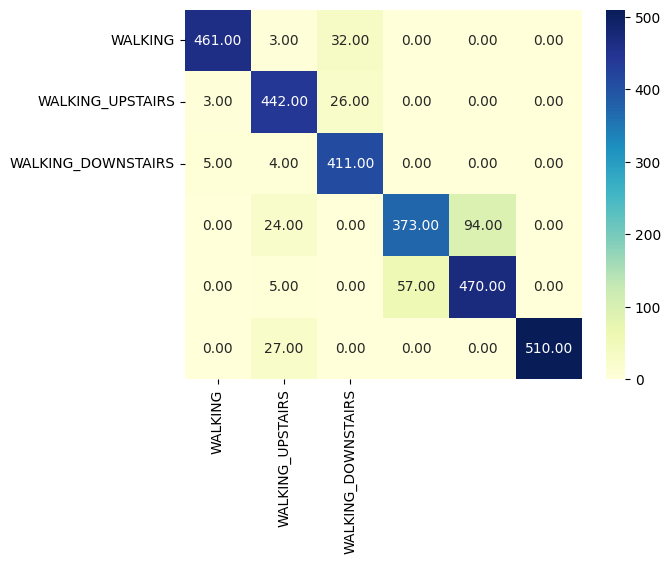

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# CNN 2


In [13]:
# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 64)           1792      
                                                                 
 conv1d_1 (Conv1D)           (None, 124, 64)           12352     
                                                                 
 flatten (Flatten)           (None, 7936)              0         
                                                                 
 dense (Dense)               (None, 128)               1015936   
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 1030854 (3.93 MB)
Trainable params: 1030854 (3.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)


Epoch 1/10
58/58 [==============================] - 6s 76ms/step - loss: 0.5395 - accuracy: 0.7899 - val_loss: 0.2755 - val_accuracy: 0.9044
Epoch 2/10
58/58 [==============================] - 4s 70ms/step - loss: 0.1794 - accuracy: 0.9369 - val_loss: 0.1412 - val_accuracy: 0.9479
Epoch 3/10
58/58 [==============================] - 6s 107ms/step - loss: 0.1365 - accuracy: 0.9437 - val_loss: 0.1353 - val_accuracy: 0.9370
Epoch 4/10
58/58 [==============================] - 4s 76ms/step - loss: 0.1160 - accuracy: 0.9517 - val_loss: 0.1034 - val_accuracy: 0.9619
Epoch 5/10
58/58 [==============================] - 4s 69ms/step - loss: 0.1098 - accuracy: 0.9542 - val_loss: 0.0978 - val_accuracy: 0.9642
Epoch 6/10
58/58 [==============================] - 5s 85ms/step - loss: 0.0958 - accuracy: 0.9580 - val_loss: 0.0882 - val_accuracy: 0.9642
Epoch 7/10
58/58 [==============================] - 6s 97ms/step - loss: 0.0919 - accuracy: 0.9584 - val_loss: 0.0855 - val_accuracy: 0.9592
Epoch 8/10
5

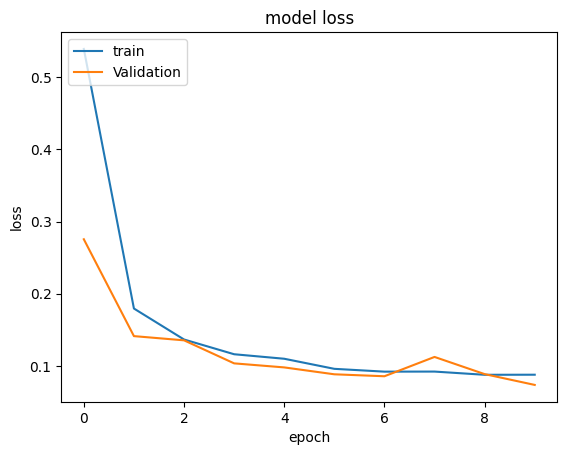

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

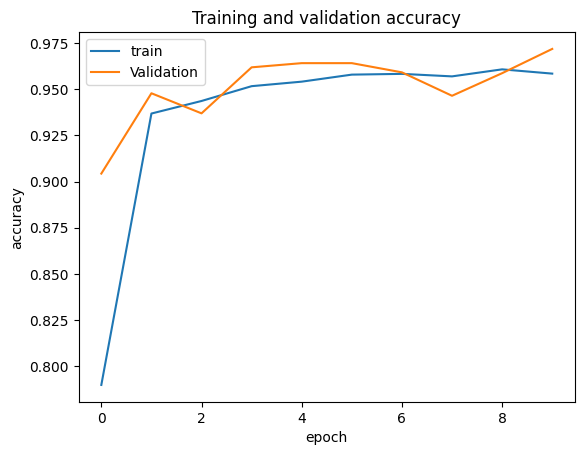

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 [==============================] - 1s 6ms/step
[[447   5  44   0   0   0]
 [  8 430  33   0   0   0]
 [  2   4 414   0   0   0]
 [  0  27   0 378  86   0]
 [  2  22   0  58 450   0]
 [  0  27   0   0   0 510]]
0.8920936545639634
0.8920114337136047
              precision    recall  f1-score   support

           0       0.97      0.90      0.94       496
           1       0.83      0.91      0.87       471
           2       0.84      0.99      0.91       420
           3       0.87      0.77      0.82       491
           4       0.84      0.85      0.84       532
           5       1.00      0.95      0.97       537

    accuracy                           0.89      2947
   macro avg       0.89      0.89      0.89      2947
weighted avg       0.90      0.89      0.89      2947



<Axes: >

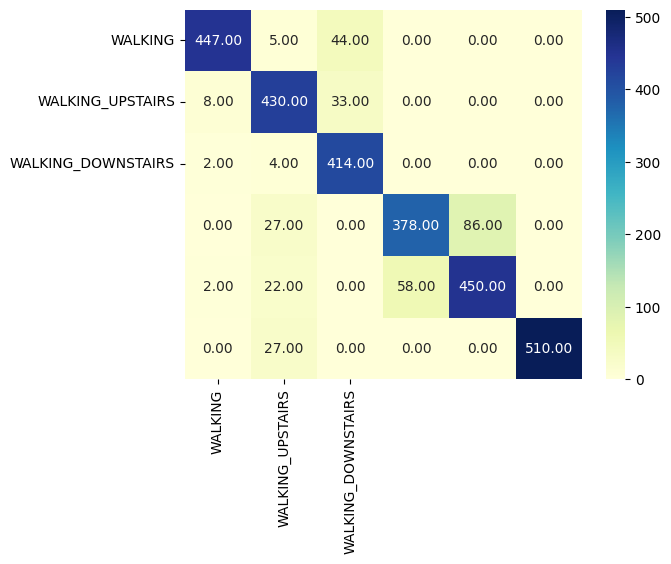

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# CNN3

In [ ]:
# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 126, 64)           1792      
                                                                 
 conv1d_14 (Conv1D)          (None, 124, 64)           12352     
                                                                 
 conv1d_15 (Conv1D)          (None, 122, 64)           12352     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 61, 64)            0         
 g1D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 3904)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               499840    
                                                      

In [ ]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)


Epoch 1/10
58/58 [==============================] - 8s 114ms/step - loss: 0.5735 - accuracy: 0.7648 - val_loss: 0.2902 - val_accuracy: 0.8935
Epoch 2/10
58/58 [==============================] - 5s 93ms/step - loss: 0.1889 - accuracy: 0.9312 - val_loss: 0.1336 - val_accuracy: 0.9465
Epoch 3/10
58/58 [==============================] - 5s 87ms/step - loss: 0.1349 - accuracy: 0.9460 - val_loss: 0.1604 - val_accuracy: 0.9352
Epoch 4/10
58/58 [==============================] - 7s 115ms/step - loss: 0.1249 - accuracy: 0.9475 - val_loss: 0.1083 - val_accuracy: 0.9565
Epoch 5/10
58/58 [==============================] - 5s 81ms/step - loss: 0.1049 - accuracy: 0.9562 - val_loss: 0.1072 - val_accuracy: 0.9569
Epoch 6/10
58/58 [==============================] - 5s 93ms/step - loss: 0.1050 - accuracy: 0.9539 - val_loss: 0.0979 - val_accuracy: 0.9560
Epoch 7/10
58/58 [==============================] - 6s 101ms/step - loss: 0.1056 - accuracy: 0.9548 - val_loss: 0.0933 - val_accuracy: 0.9587
Epoch 8/10

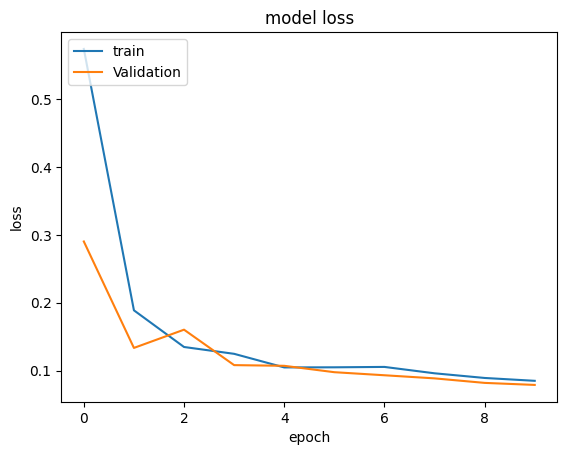

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

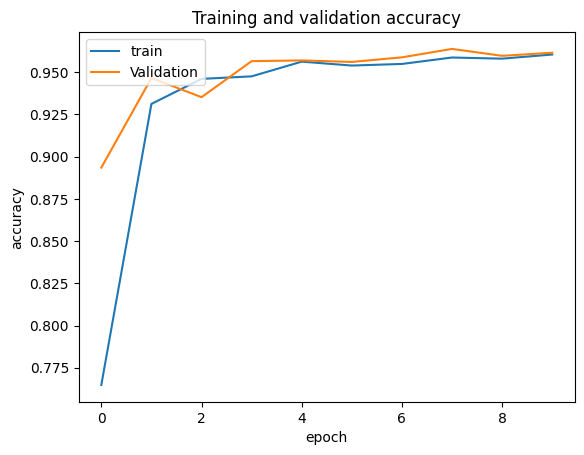

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 [==============================] - 1s 7ms/step
[[486   0  10   0   0   0]
 [ 10 436  25   0   0   0]
 [ 10   5 405   0   0   0]
 [  0  22   1 417  50   1]
 [  2   0   0  84 446   0]
 [ 24   3   0   0   0 510]]
0.9161859518154055
0.9160151984749761
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       496
           1       0.94      0.93      0.93       471
           2       0.92      0.96      0.94       420
           3       0.83      0.85      0.84       491
           4       0.90      0.84      0.87       532
           5       1.00      0.95      0.97       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



<Axes: >

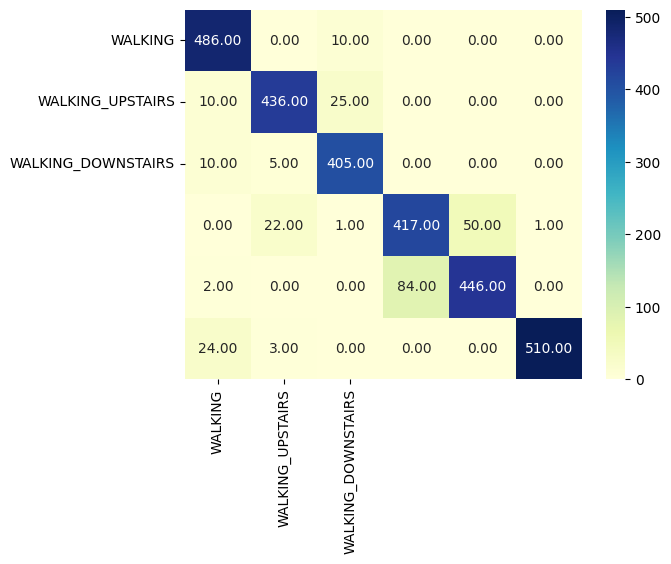

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# CNN4

In [ ]:
# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 126, 64)           1792      
                                                                 
 conv1d_17 (Conv1D)          (None, 124, 64)           12352     
                                                                 
 conv1d_18 (Conv1D)          (None, 122, 64)           12352     
                                                                 
 conv1d_19 (Conv1D)          (None, 120, 64)           12352     
                                                                 
 flatten_7 (Flatten)         (None, 7680)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               983168    
                                                                 
 dense_15 (Dense)            (None, 6)                

In [ ]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)


Epoch 1/10
58/58 [==============================] - 10s 151ms/step - loss: 0.5781 - accuracy: 0.7612 - val_loss: 0.2130 - val_accuracy: 0.9302
Epoch 2/10
58/58 [==============================] - 7s 115ms/step - loss: 0.1577 - accuracy: 0.9376 - val_loss: 0.1132 - val_accuracy: 0.9578
Epoch 3/10
58/58 [==============================] - 8s 144ms/step - loss: 0.1116 - accuracy: 0.9543 - val_loss: 0.1005 - val_accuracy: 0.9578
Epoch 4/10
58/58 [==============================] - 7s 116ms/step - loss: 0.1075 - accuracy: 0.9539 - val_loss: 0.0964 - val_accuracy: 0.9601
Epoch 5/10
58/58 [==============================] - 8s 147ms/step - loss: 0.1023 - accuracy: 0.9548 - val_loss: 0.0887 - val_accuracy: 0.9587
Epoch 6/10
58/58 [==============================] - 7s 115ms/step - loss: 0.0941 - accuracy: 0.9569 - val_loss: 0.0816 - val_accuracy: 0.9619
Epoch 7/10
58/58 [==============================] - 8s 140ms/step - loss: 0.0929 - accuracy: 0.9581 - val_loss: 0.0992 - val_accuracy: 0.9524
Epoch

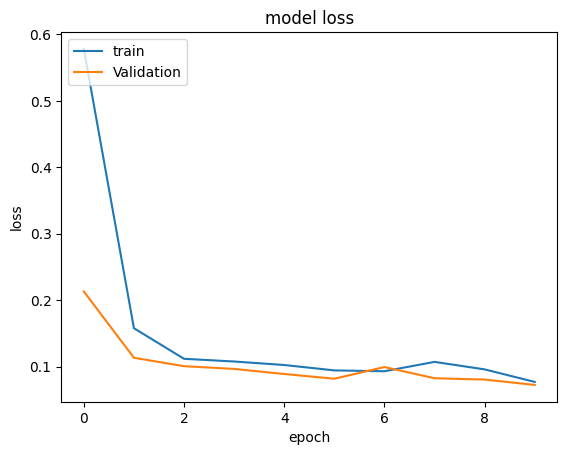

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

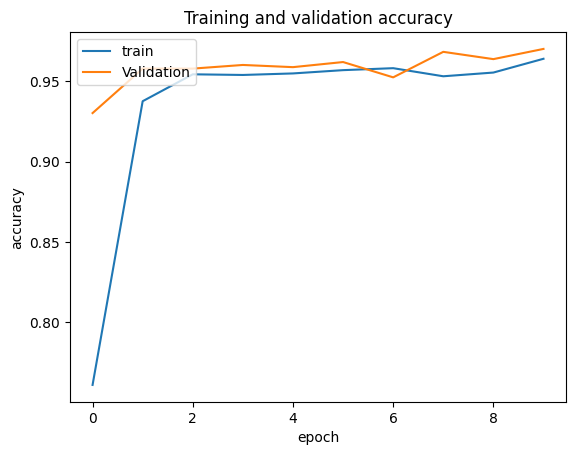

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 [==============================] - 2s 15ms/step
[[459  13  24   0   0   0]
 [  0 447  24   0   0   0]
 [  4   1 415   0   0   0]
 [  1  20   2 383  82   3]
 [  0   3   0  37 492   0]
 [  0  17   0   0   0 520]]
0.9216152019002375
0.9210844943399252
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       496
           1       0.89      0.95      0.92       471
           2       0.89      0.99      0.94       420
           3       0.91      0.78      0.84       491
           4       0.86      0.92      0.89       532
           5       0.99      0.97      0.98       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



<Axes: >

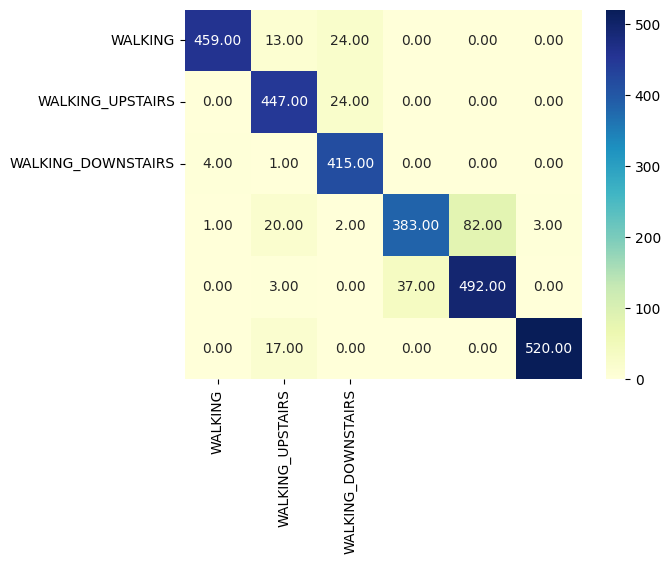

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# CNN5

In [ ]:
# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 64)           1792      
                                                                 
 conv1d_1 (Conv1D)           (None, 124, 64)           12352     
                                                                 
 conv1d_2 (Conv1D)           (None, 122, 64)           12352     
                                                                 
 conv1d_3 (Conv1D)           (None, 120, 64)           12352     
                                                                 
 conv1d_4 (Conv1D)           (None, 118, 64)           12352     
                                                                 
 flatten (Flatten)           (None, 7552)              0         
                                                                 
 dense (Dense)               (None, 128)               9

In [ ]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)


Epoch 1/10
58/58 [==============================] - 14s 209ms/step - loss: 0.5777 - accuracy: 0.7680 - val_loss: 0.3658 - val_accuracy: 0.8409
Epoch 2/10
58/58 [==============================] - 11s 189ms/step - loss: 0.1970 - accuracy: 0.9200 - val_loss: 0.1258 - val_accuracy: 0.9451
Epoch 3/10
58/58 [==============================] - 12s 216ms/step - loss: 0.1252 - accuracy: 0.9453 - val_loss: 0.1094 - val_accuracy: 0.9569
Epoch 4/10
58/58 [==============================] - 10s 174ms/step - loss: 0.1189 - accuracy: 0.9479 - val_loss: 0.1038 - val_accuracy: 0.9551
Epoch 5/10
58/58 [==============================] - 13s 223ms/step - loss: 0.1050 - accuracy: 0.9547 - val_loss: 0.0969 - val_accuracy: 0.9574
Epoch 6/10
58/58 [==============================] - 13s 227ms/step - loss: 0.0987 - accuracy: 0.9554 - val_loss: 0.0912 - val_accuracy: 0.9615
Epoch 7/10
58/58 [==============================] - 10s 175ms/step - loss: 0.0963 - accuracy: 0.9585 - val_loss: 0.0896 - val_accuracy: 0.9597

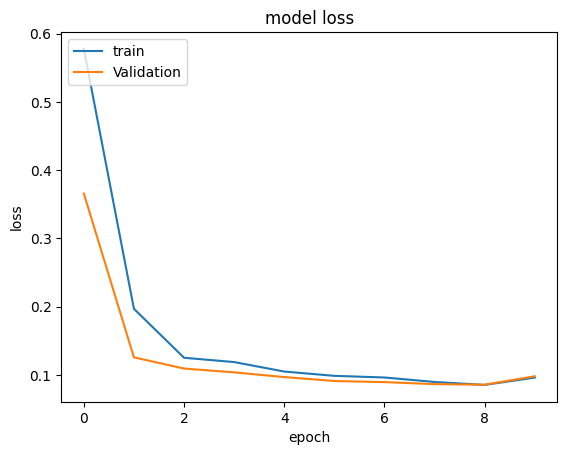

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

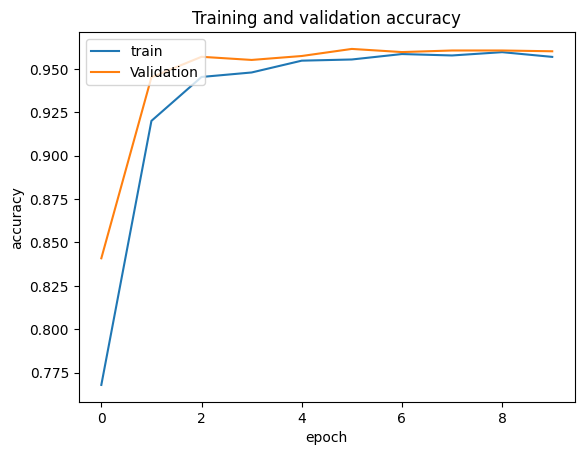

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 [==============================] - 3s 34ms/step
[[458  22  16   0   0   0]
 [  1 448  20   0   0   2]
 [  5   4 411   0   0   0]
 [  0   4   0 343 124  20]
 [  1   0   0  47 484   0]
 [  0   0   0   0   0 537]]
0.9097387173396675
0.9080240419786426
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       496
           1       0.94      0.95      0.94       471
           2       0.92      0.98      0.95       420
           3       0.88      0.70      0.78       491
           4       0.80      0.91      0.85       532
           5       0.96      1.00      0.98       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



<Axes: >

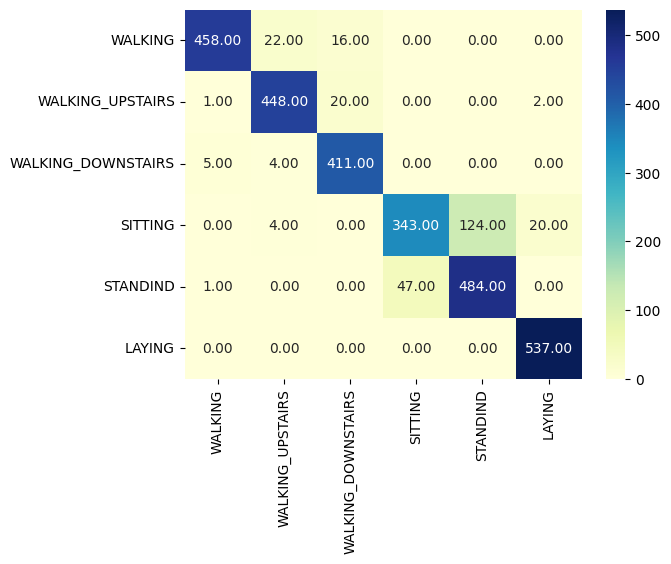

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDIND','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')